# Data Description

Task is to predict whether the customer will be paying back the loaned amount within 5 days of insurance or not.Label 1 indicates that Loan has been payed i.e. Non-defaulters. Label 0 means loan has not been payed. i.e. Defaulters

# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df=pd.read_csv('Data file.csv')
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-16
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-16
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-16
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-16
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-16


In [3]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [4]:
df=df.rename(columns={'Unnamed: 0':'S.No'})

In [5]:
df.head()

,S.No,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-16
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-16
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-16
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-16
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-16


In [6]:
df.set_index('S.No',inplace=True)

In [7]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
S.No,,,,,,,,,,,,,,,,,,,,,
1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-16
2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-16
3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-16
4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-16
5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-16


In [8]:
df.shape

(209593, 36)

we have 36 columns and 209593 rows

In [9]:
df.dtypes

label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

Here, we can see that variables, 'misisdn','pcircle', 'pdate' are having object datatype

In [10]:
df['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

Here, variable 'msisdn'is mobile number, which does not give us any important information, 

      variable 'pcircle' has only one type which does not make any impact on the data set.
      
Hence, we can drop this variables.

Now lets drop these two variables and check if there is any correlation between date and label 

In [11]:
df.drop('msisdn',axis=1,inplace=True)

In [12]:
df.drop('pcircle',axis=1,inplace=True)

We can also drop the column date

In [13]:
df.drop('pdate',axis=1,inplace=True)

In [14]:
df.dtypes

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback3

In [15]:
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
S.No,,,,,,,,,,,,,,,,,,,,,
1,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
2,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
3,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
4,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
5,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333


In [16]:
df.dtypes

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback3

Now, all the datatypes are numeric.

In [17]:
#Checking the null values 
df.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
dtype: int64

This indicates that there are no null values in the data.

In [18]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.84780,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.89223,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.00000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.00000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.00000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.00000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.37770,999171.809400,55000.000000,203.000000,...,50.000000,306.000000,99864.560860,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


We can observe that data has too many outliers and data is highly skewed.

<AxesSubplot:>

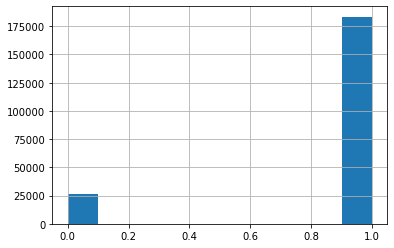

In [19]:
# checking the data balancing
df['label'].hist(grid=True)

In [174]:
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

Here, we can see that there is imbalance in the dataset

# Checking the correlation

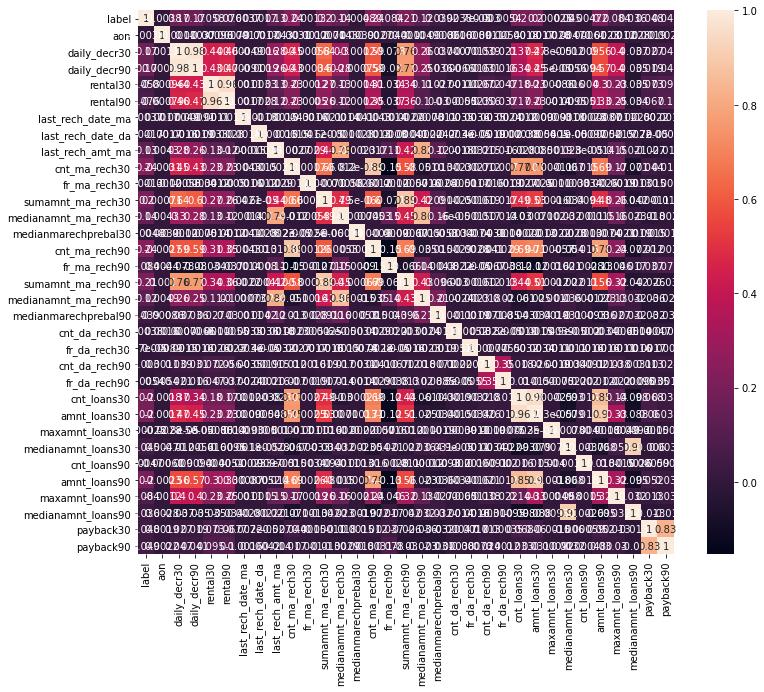

In [20]:
dfcor=df.corr()
plt.figure(figsize=[12,10])
sns.heatmap(dfcor, annot=True)
plt.show()

In [21]:
dfcor

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,...,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,...,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,...,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,...,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,...,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,...,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,...,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,...,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,...,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,...,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362


# Checking and treating outliers

In [22]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

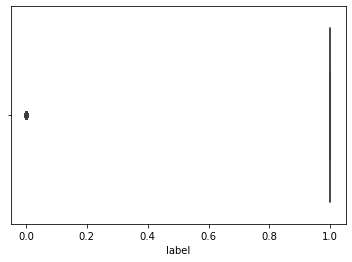

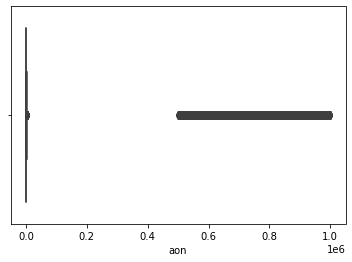

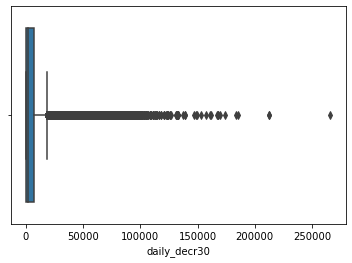

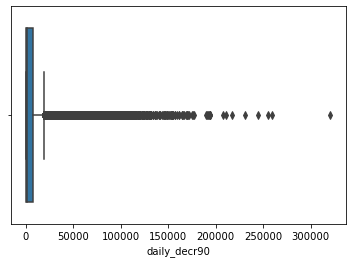

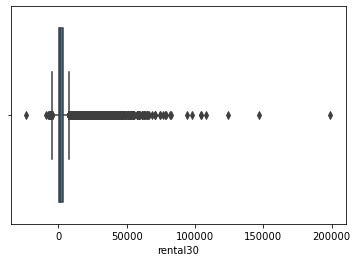

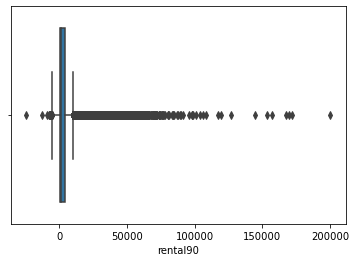

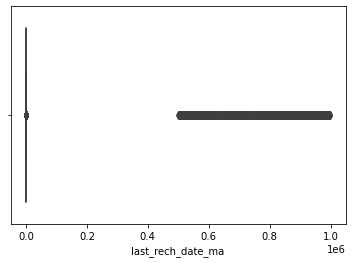

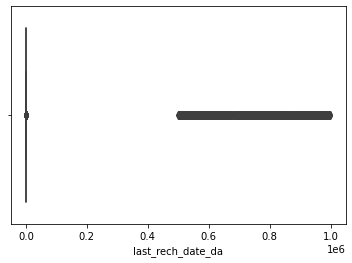

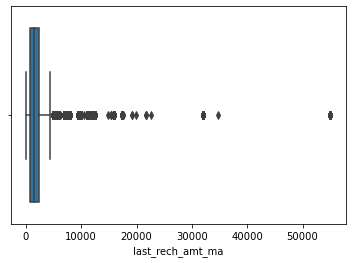

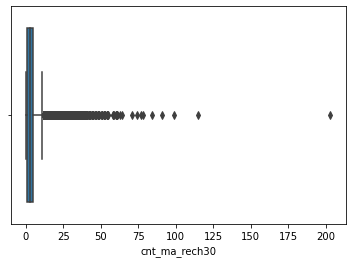

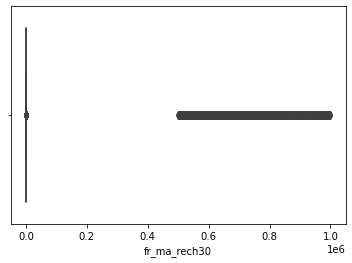

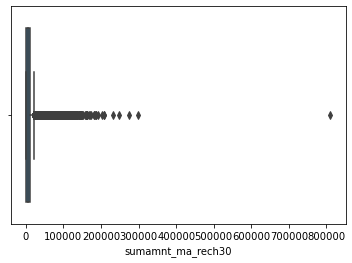

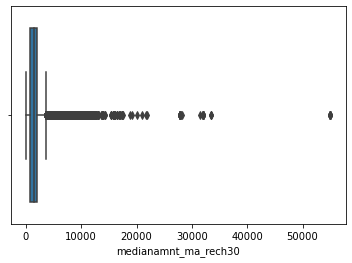

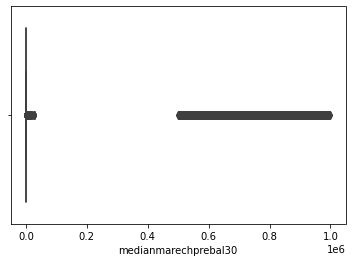

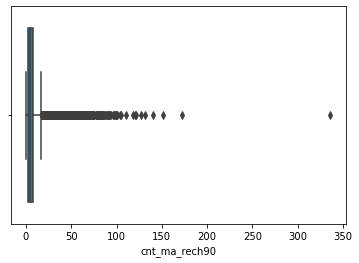

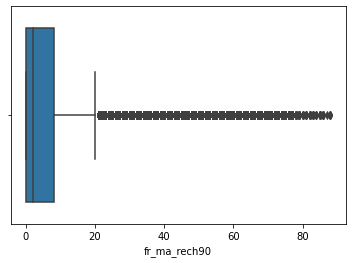

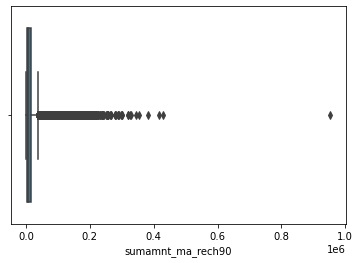

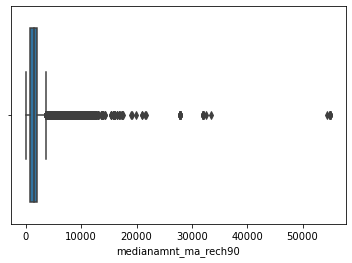

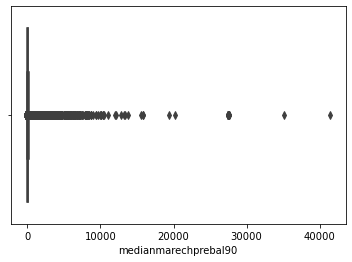

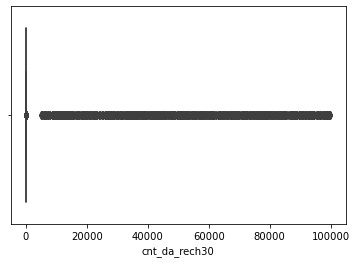

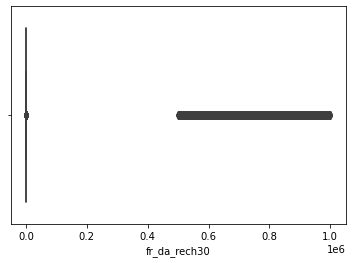

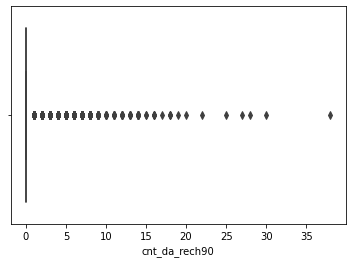

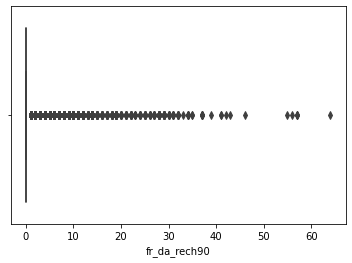

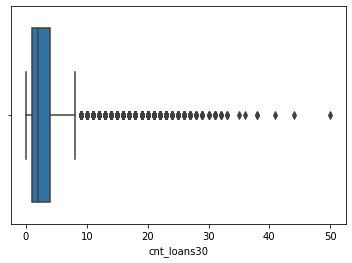

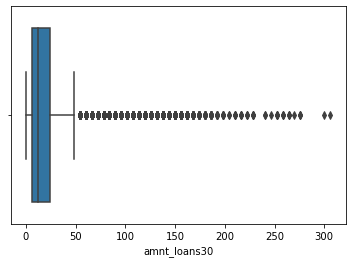

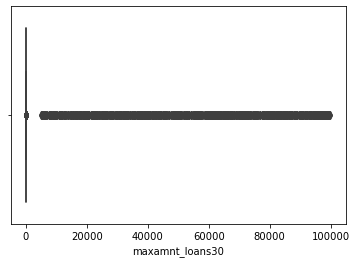

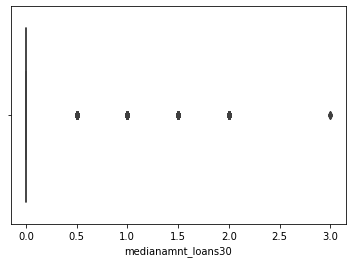

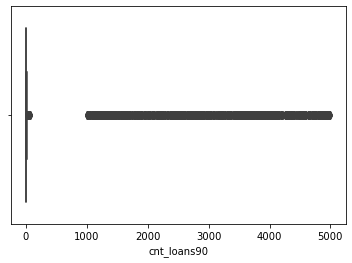

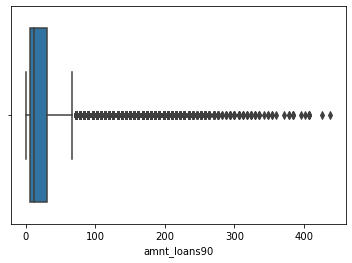

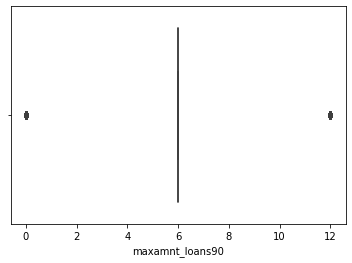

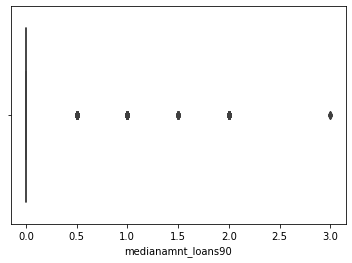

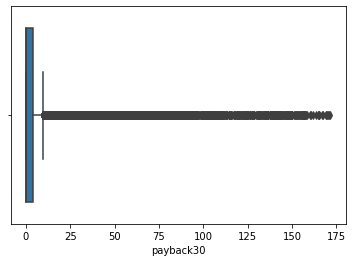

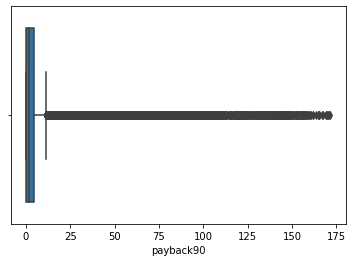

In [23]:
columns=['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90']

for i in df[columns]:
    sns.boxplot(df[i])
    plt.show()


In [24]:
for i in df[columns]:
    IQR=df[i].quantile(0.75)-df[i].quantile(0.25)
    lower_bridge=df[i].quantile(0.25)-(IQR*3)
    upper_bridge=df[i].quantile(0.75)+(IQR*3)
    print('Lower bridge for',i,lower_bridge),print('Upper bridge for',i,upper_bridge)
    data=df.copy()
    data.loc[data[i]> upper_bridge,i] = upper_bridge

Lower bridge for label 1.0
Upper bridge for label 1.0
Lower bridge for aon -1962.0
Upper bridge for aon 3190.0
Lower bridge for daily_decr30 -21562.24
Upper bridge for daily_decr30 28848.68
Lower bridge for daily_decr90 -23237.602000000003
Upper bridge for daily_decr90 31083.084000000003
Lower bridge for rental30 -8949.14
Upper bridge for rental30 12586.5
Lower bridge for rental90 -11404.33
Upper bridge for rental90 15906.380000000001
Lower bridge for last_rech_date_ma -17.0
Upper bridge for last_rech_date_ma 25.0
Lower bridge for last_rech_date_da 0.0
Upper bridge for last_rech_date_da 0.0
Lower bridge for last_rech_amt_ma -3847.0
Upper bridge for last_rech_amt_ma 6926.0
Lower bridge for cnt_ma_rech30 -11.0
Upper bridge for cnt_ma_rech30 17.0
Lower bridge for fr_ma_rech30 -18.0
Upper bridge for fr_ma_rech30 24.0
Lower bridge for sumamnt_ma_rech30 -23870.0
Upper bridge for sumamnt_ma_rech30 35420.0
Lower bridge for medianamnt_ma_rech30 -2692.0
Upper bridge for medianamnt_ma_rech30 5386

In [25]:
data.loc[data['aon']> 3190.0,'aon'] = 3190.0

In [26]:
data.loc[data['daily_decr30']> 28848.68,'daily_decr30'] = 28848.68

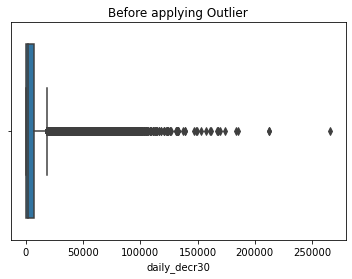

In [27]:
sns.boxplot(df['daily_decr30'])
plt.title('Before applying Outlier')
plt.show()

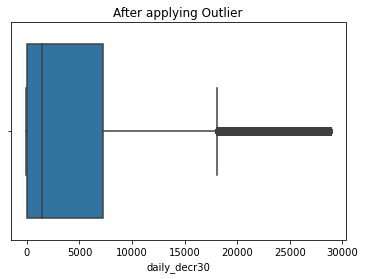

In [28]:
sns.boxplot(data['daily_decr30'])
plt.title('After applying Outlier')
plt.show()

In [29]:
data.loc[data['daily_decr90']> 31083.084000000003,'daily_decr90'] = 31083.084000000003

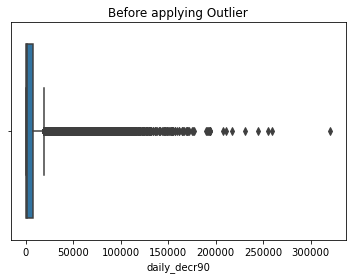

In [30]:
sns.boxplot(df['daily_decr90'])
plt.title('Before applying Outlier')
plt.show()

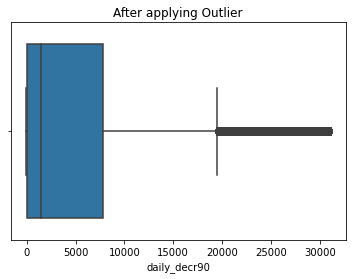

In [31]:
sns.boxplot(data['daily_decr90'])
plt.title('After applying Outlier')
plt.show()

In [32]:
data.loc[data['rental30']> 12586.5,'rental30'] = 12586.5

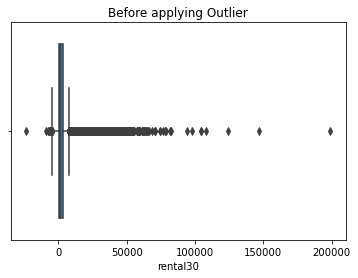

In [33]:
sns.boxplot(df['rental30'])
plt.title('Before applying Outlier')
plt.show()

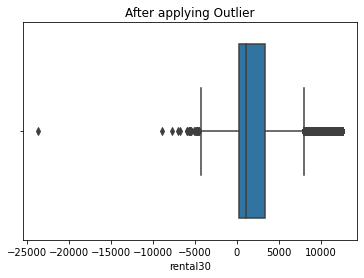

In [34]:
sns.boxplot(data['rental30'])
plt.title('After applying Outlier')
plt.show()

In [35]:
data.loc[data['rental90']> 15906.380000000001,'rental90'] = 15906.380000000001

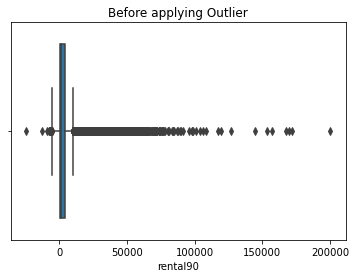

In [36]:
sns.boxplot(df['rental90'])
plt.title('Before applying Outlier')
plt.show()

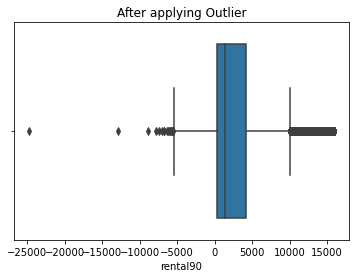

In [37]:
sns.boxplot(data['rental90'])
plt.title('After applying Outlier')
plt.show()

In [38]:
data.loc[data['last_rech_date_ma']> 25,'last_rech_date_ma'] = 25

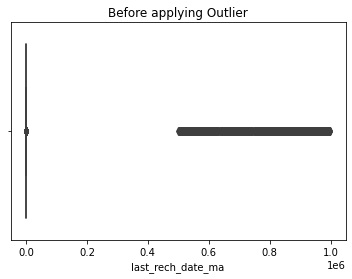

In [39]:
sns.boxplot(df['last_rech_date_ma'])
plt.title('Before applying Outlier')
plt.show()

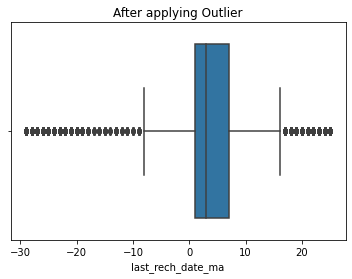

In [40]:
sns.boxplot(data['last_rech_date_ma'])
plt.title('After applying Outlier')
plt.show()

In [41]:
data.loc[data['last_rech_amt_ma']> 6926.0,'last_rech_amt_ma'] = 6926.0

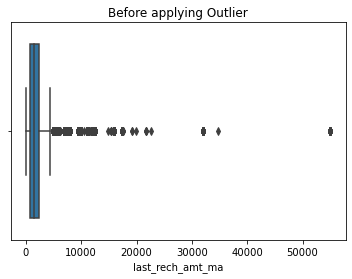

In [42]:
sns.boxplot(df['last_rech_amt_ma'])
plt.title('Before applying Outlier')
plt.show()

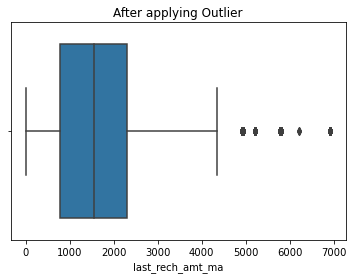

In [43]:
sns.boxplot(data['last_rech_amt_ma'])
plt.title('After applying Outlier')
plt.show()

In [44]:
data.loc[data['cnt_ma_rech30']> 17.0,'cnt_ma_rech30'] = 17.0

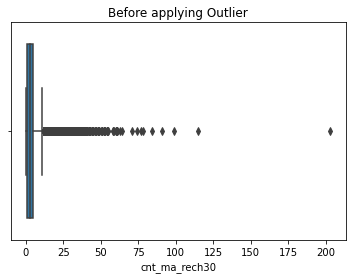

In [45]:
sns.boxplot(df['cnt_ma_rech30'])
plt.title('Before applying Outlier')
plt.show()

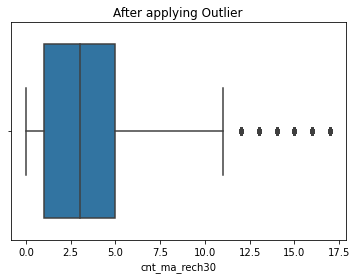

In [46]:
sns.boxplot(data['cnt_ma_rech30'])
plt.title('After applying Outlier')
plt.show()

In [47]:
data.loc[data['fr_ma_rech30']> 24.0,'fr_ma_rech30'] = 24.0

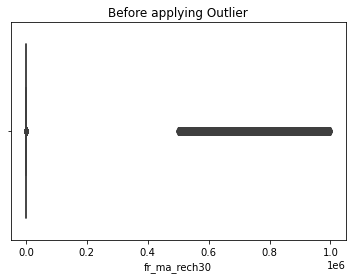

In [48]:
sns.boxplot(df['fr_ma_rech30'])
plt.title('Before applying Outlier')
plt.show()

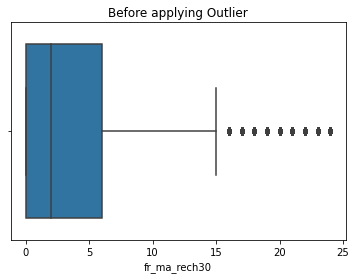

In [49]:
sns.boxplot(data['fr_ma_rech30'])
plt.title('Before applying Outlier')
plt.show()

In [50]:
data.loc[data['sumamnt_ma_rech30']> 35420.0,'sumamnt_ma_rech30'] = 35420.0

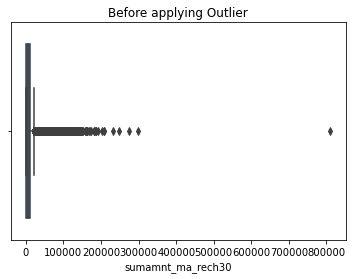

In [51]:
sns.boxplot(df['sumamnt_ma_rech30'])
plt.title('Before applying Outlier')
plt.show()

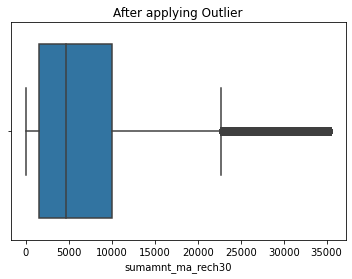

In [52]:
sns.boxplot(data['sumamnt_ma_rech30'])
plt.title('After applying Outlier')
plt.show()

In [53]:
data.loc[data['medianamnt_ma_rech30']> 5386.0,'medianamnt_ma_rech30'] = 5386.0

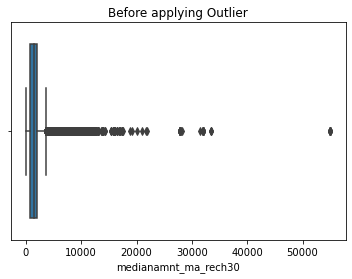

In [54]:
sns.boxplot(df['medianamnt_ma_rech30'])
plt.title('Before applying Outlier')
plt.show()

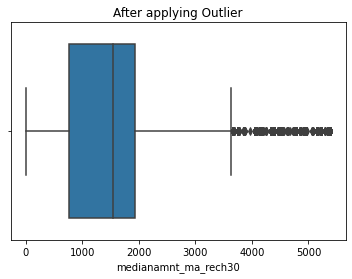

In [55]:
sns.boxplot(data['medianamnt_ma_rech30'])
plt.title('After applying Outlier')
plt.show()

In [56]:
data.loc[data['medianmarechprebal30']> 299.0,'medianmarechprebal30'] = 299.0

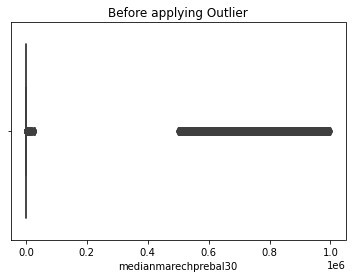

In [57]:
sns.boxplot(df['medianmarechprebal30'])
plt.title('Before applying Outlier')
plt.show()

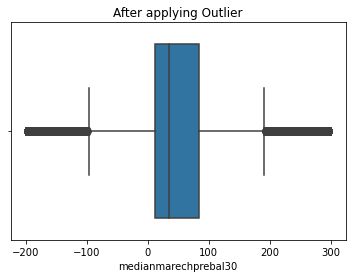

In [58]:
sns.boxplot(data['medianmarechprebal30'])
plt.title('After applying Outlier')
plt.show()

In [59]:
data.loc[data['cnt_ma_rech90']> 26.0,'cnt_ma_rech90'] = 26.0

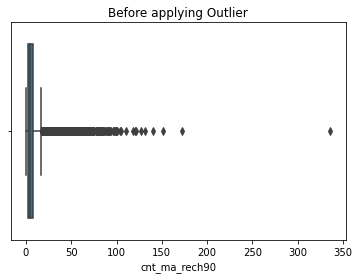

In [60]:
sns.boxplot(df['cnt_ma_rech90'])
plt.title('Before applying Outlier')
plt.show()

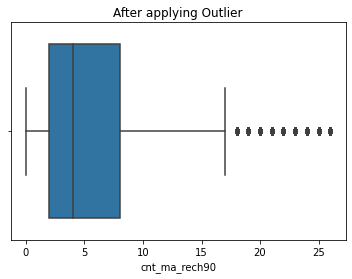

In [61]:
sns.boxplot(data['cnt_ma_rech90'])
plt.title('After applying Outlier')
plt.show()

In [62]:
data.loc[data['fr_ma_rech90']> 32.0,'fr_ma_rech90'] = 32.0

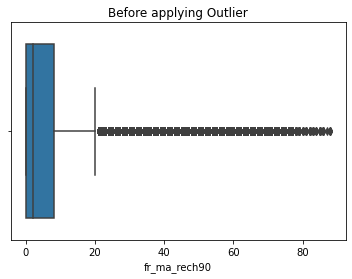

In [63]:
sns.boxplot(df['fr_ma_rech90'])
plt.title('Before applying Outlier')
plt.show()

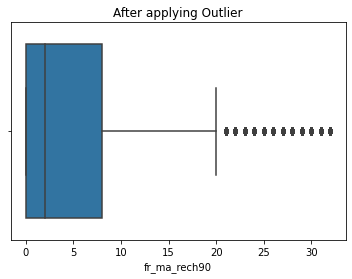

In [64]:
sns.boxplot(data['fr_ma_rech90'])
plt.title('After applying Outlier')
plt.show()

In [65]:
data.loc[data['sumamnt_ma_rech90']> 57049.0,'sumamnt_ma_rech90'] = 57049.0

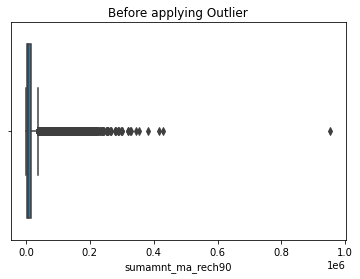

In [66]:
sns.boxplot(df['sumamnt_ma_rech90'])
plt.title('Before applying Outlier')
plt.show()

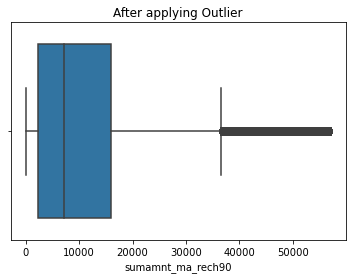

In [67]:
sns.boxplot(data['sumamnt_ma_rech90'])
plt.title('After applying Outlier')
plt.show()

In [68]:
data.loc[data['medianamnt_ma_rech90']> 5377.0,'medianamnt_ma_rech90'] = 5377.0

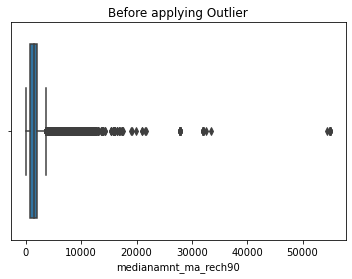

In [69]:
sns.boxplot(df['medianamnt_ma_rech90'])
plt.title('Before applying Outlier')
plt.show()

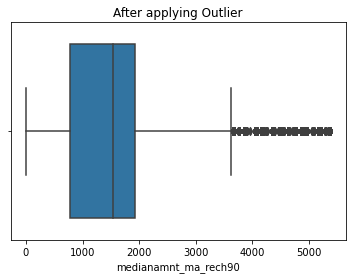

In [70]:
sns.boxplot(data['medianamnt_ma_rech90'])
plt.title('After applying Outlier')
plt.show()

In [71]:
data.loc[data['medianmarechprebal90']> 273.0,'medianmarechprebal90'] = 273.0

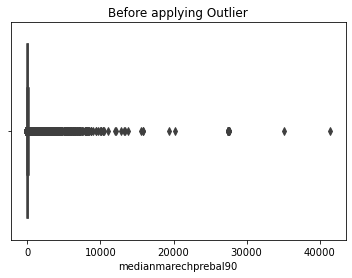

In [72]:
sns.boxplot(df['medianmarechprebal90'])
plt.title('Before applying Outlier')
plt.show()

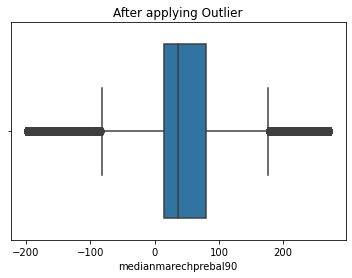

In [73]:
sns.boxplot(data['medianmarechprebal90'])
plt.title('After applying Outlier')
plt.show()

In [74]:
data.loc[data['cnt_loans30']> 13.0,'cnt_loans30'] = 13.0

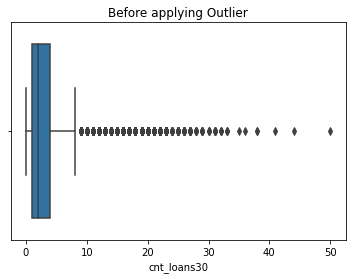

In [75]:
sns.boxplot(df['cnt_loans30'])
plt.title('Before applying Outlier')
plt.show()

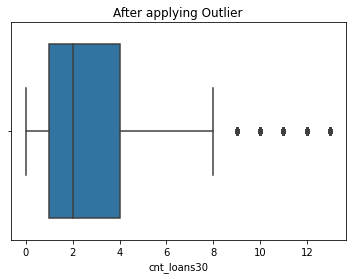

In [76]:
sns.boxplot(data['cnt_loans30'])
plt.title('After applying Outlier')
plt.show()

In [77]:
data.loc[data['amnt_loans30']> 78.0,'amnt_loans30'] = 78.0

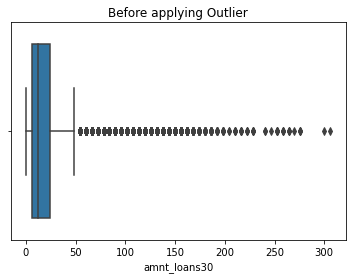

In [78]:
sns.boxplot(df['amnt_loans30'])
plt.title('Before applying Outlier')
plt.show()

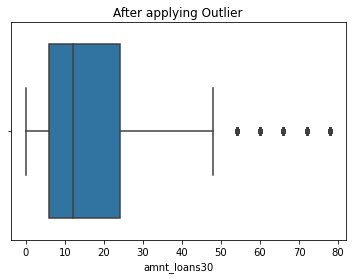

In [79]:
sns.boxplot(data['amnt_loans30'])
plt.title('After applying Outlier')
plt.show()

In [80]:
data.loc[data['maxamnt_loans30']> 6.0,'maxamnt_loans30'] = 6.0
data.loc[data['maxamnt_loans30']< 6.0,'maxamnt_loans30'] = 6.0

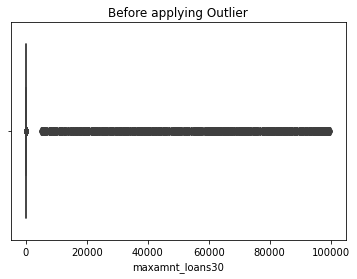

In [81]:
sns.boxplot(df['maxamnt_loans30'])
plt.title('Before applying Outlier')
plt.show()

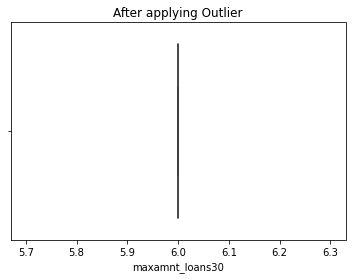

In [82]:
sns.boxplot(data['maxamnt_loans30'])
plt.title('After applying Outlier')
plt.show()

In [83]:
data.loc[data['medianamnt_loans30']> 0.0,'medianamnt_loans30'] = 0.0
data.loc[data['medianamnt_loans30']< 0.0,'medianamnt_loans30'] = 0.0

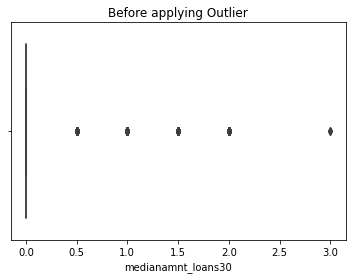

In [84]:
sns.boxplot(df['medianamnt_loans30'])
plt.title('Before applying Outlier')
plt.show()

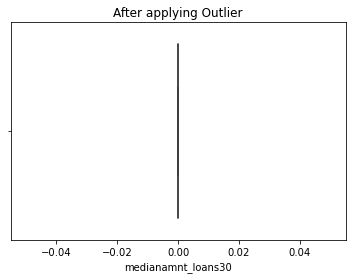

In [85]:
sns.boxplot(data['medianamnt_loans30'])
plt.title('After applying Outlier')
plt.show()

In [86]:
data.loc[data['cnt_loans90']> 17.0,'cnt_loans90'] = 17.0

In [87]:
data.loc[data['amnt_loans90']> 102.0,'amnt_loans90'] = 102.0

In [88]:
data.loc[data['maxamnt_loans90']> 6.0,'maxamnt_loans90'] = 6.0
data.loc[data['maxamnt_loans90']< 6.0,'maxamnt_loans90'] = 6.0

In [89]:
data.loc[data['medianamnt_loans90']> 0.0,'medianamnt_loans90'] = 0.0
data.loc[data['medianamnt_loans90']< 0.0,'medianamnt_loans90'] = 0.0

In [90]:
data.loc[data['payback30']> 15.0,'payback30'] = 15.0

In [91]:
data.loc[data['payback90']> 18.0,'payback90'] = 18.0

In [92]:
data.loc[data['last_rech_date_da']> 0.0,'last_rech_date_da'] = 0.0
data.loc[data['last_rech_date_da']< 0.0,'last_rech_date_da'] = 0.0

In [93]:
data.loc[data['cnt_da_rech30']> 0.0,'cnt_da_rech30'] = 0.0
data.loc[data['cnt_da_rech30']< 0.0,'cnt_da_rech30'] = 0.0

In [94]:
data.loc[data['fr_da_rech30']> 0.0,'fr_da_rech30'] = 0.0
data.loc[data['fr_da_rech30']< 0.0,'fr_da_rech30'] = 0.0

In [95]:
data.loc[data['cnt_da_rech90']> 0.0,'cnt_da_rech90'] = 0.0
data.loc[data['cnt_da_rech90']< 0.0,'cnt_da_rech90'] = 0.0

In [96]:
data.loc[data['fr_da_rech90']> 0.0,'fr_da_rech90'] = 0.0
data.loc[data['fr_da_rech90']< 0.0,'fr_da_rech90'] = 0.0

In [97]:
df=data

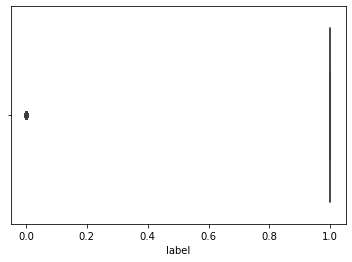

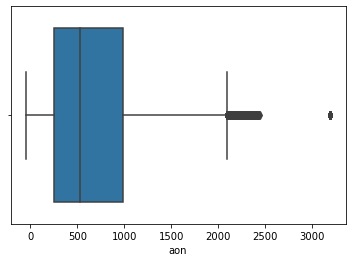

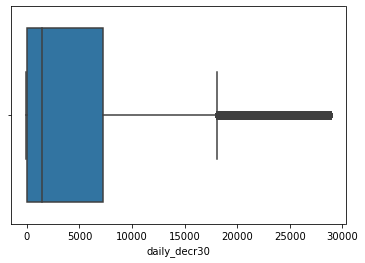

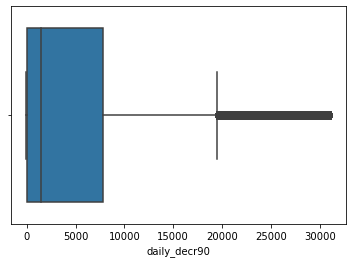

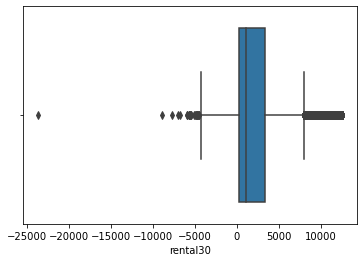

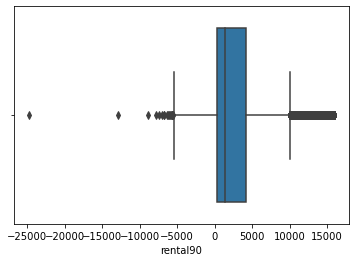

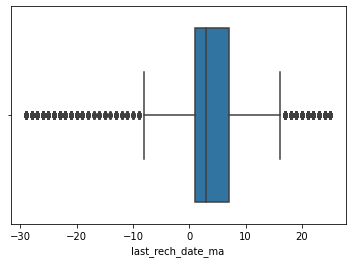

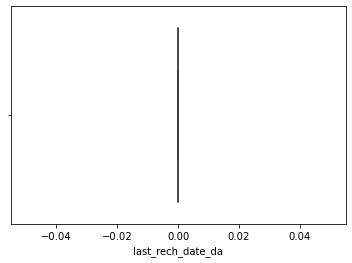

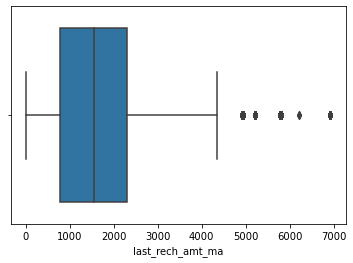

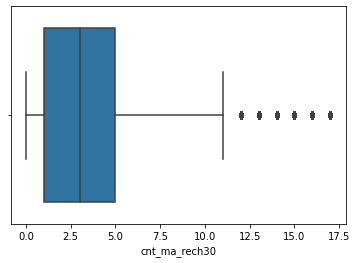

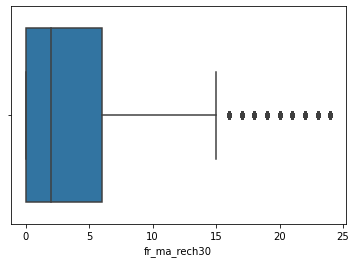

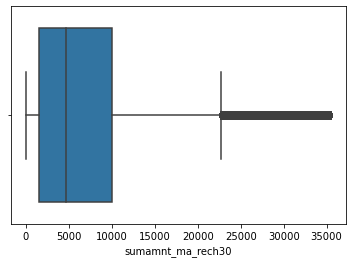

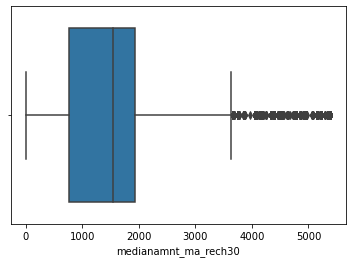

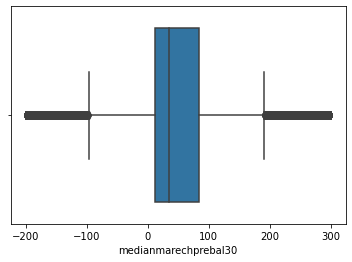

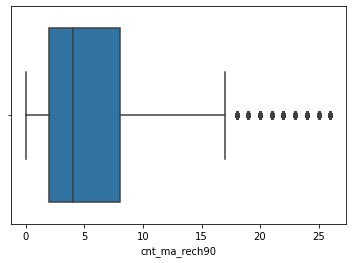

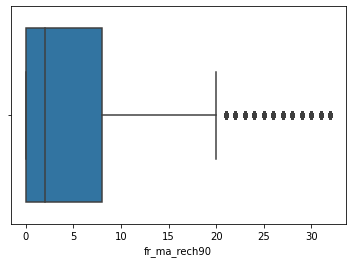

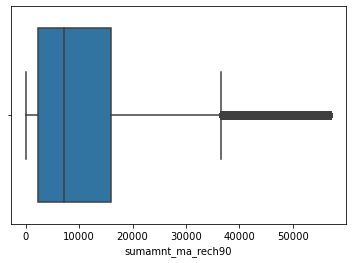

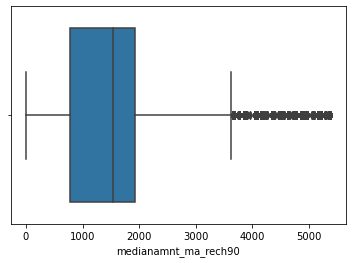

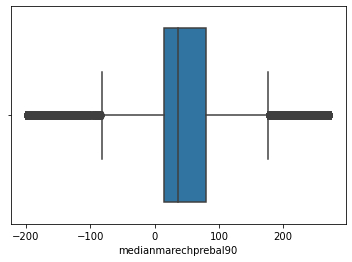

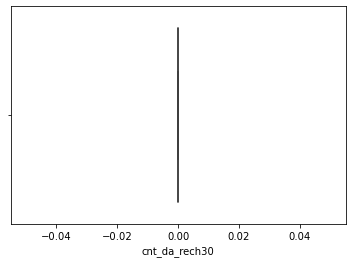

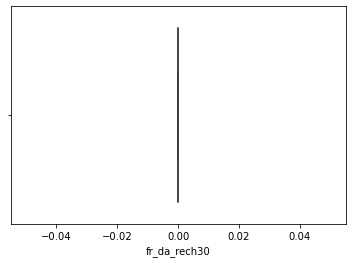

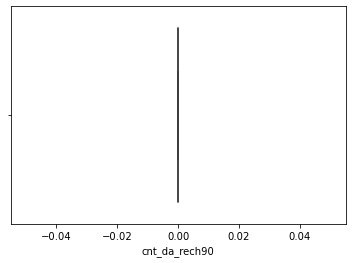

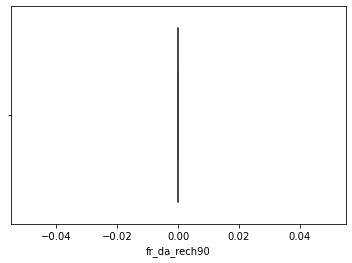

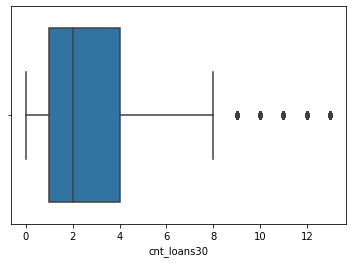

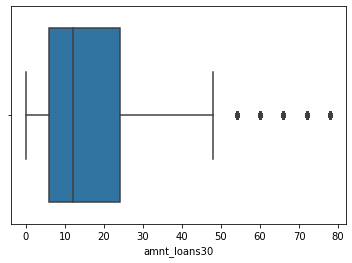

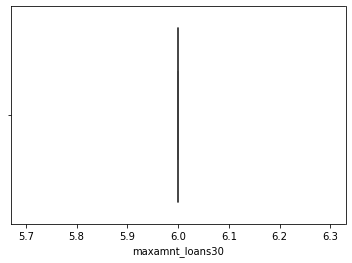

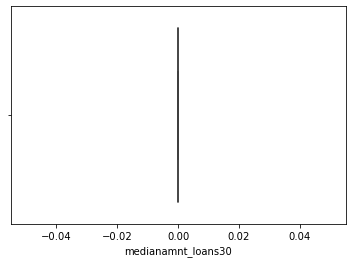

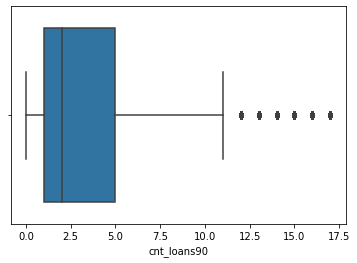

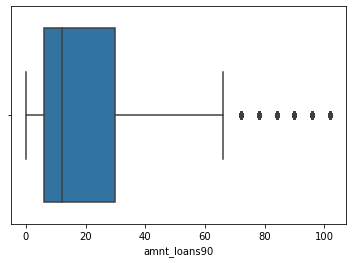

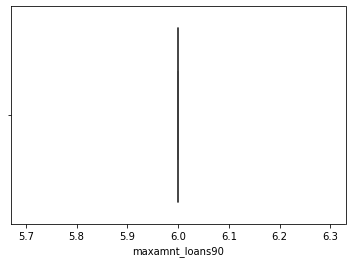

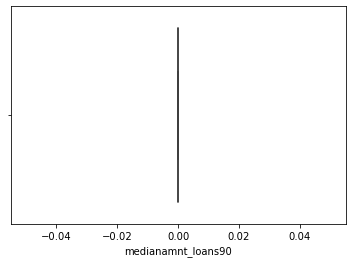

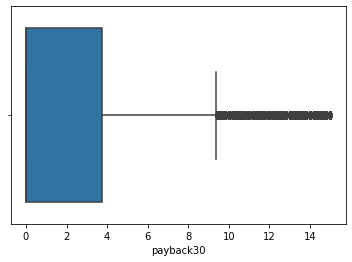

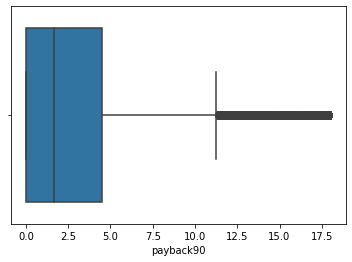

In [98]:
columns=['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90']

for i in df[columns]:
    sns.boxplot(df[i])
    plt.show()

# Splitting the dataset

In [99]:
x=df.drop('label',axis=1)
y=df['label']

In [100]:
x.head()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
S.No,,,,,,,,,,,,,,,,,,,,,
1,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,...,2,12,6.0,0.0,2.0,12,6,0.0,15.000000,18.000000
2,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,...,1,12,6.0,0.0,1.0,12,6,0.0,0.000000,0.000000
3,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
4,241.0,21.228000,21.228000,159.42,159.42,25.0,0.0,947,0,0.0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
5,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333


# Removing the highly correlated Variables

In [101]:
x.corr()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
aon,1.000000,0.061158,0.063426,0.057993,0.062051,0.034072,NaN,0.083809,-0.000267,0.038750,...,0.031076,0.034361,NaN,NaN,0.058746,0.060246,NaN,NaN,0.019419,0.038577
daily_decr30,0.061158,1.000000,0.984312,0.514353,0.551643,-0.046869,NaN,0.296934,0.471035,0.060979,...,0.387821,0.484364,NaN,NaN,0.522972,0.598410,NaN,NaN,0.105633,0.134042
daily_decr90,0.063426,0.984312,1.000000,0.510246,0.563883,-0.040313,NaN,0.286957,0.452664,0.065156,...,0.366369,0.464122,NaN,NaN,0.527350,0.603012,NaN,NaN,0.100369,0.131941
rental30,0.057993,0.514353,0.510246,1.000000,0.961556,-0.017044,NaN,0.132508,0.283880,0.051371,...,0.219013,0.274698,NaN,NaN,0.308177,0.352184,NaN,NaN,0.137384,0.167880
rental90,0.062051,0.551643,0.563883,0.961556,1.000000,-0.004144,NaN,0.131579,0.282816,0.058083,...,0.212272,0.275565,NaN,NaN,0.334943,0.383312,NaN,NaN,0.136204,0.180857
last_rech_date_ma,0.034072,-0.046869,-0.040313,-0.017044,-0.004144,1.000000,NaN,0.274775,-0.253015,-0.105076,...,-0.215784,-0.209138,NaN,NaN,-0.170605,-0.173619,NaN,NaN,-0.154109,-0.086027
last_rech_date_da,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_rech_amt_ma,0.083809,0.296934,0.286957,0.132508,0.131579,0.274775,NaN,1.000000,0.014247,0.103721,...,-0.013654,0.026370,NaN,NaN,0.008649,0.036548,NaN,NaN,-0.035858,-0.007915
cnt_ma_rech30,-0.000267,0.471035,0.452664,0.283880,0.282816,-0.253015,NaN,0.014247,1.000000,-0.028065,...,0.770489,0.764373,NaN,NaN,0.682861,0.705151,NaN,NaN,0.162052,0.105317
fr_ma_rech30,0.038750,0.060979,0.065156,0.051371,0.058083,-0.105076,NaN,0.103721,-0.028065,1.000000,...,-0.013525,-0.007933,NaN,NaN,0.015254,0.018438,NaN,NaN,0.254662,0.219526


In [102]:
def cor(data,thr):
    c_cor = set()
    cor_mat = data.corr()
    for i in range(len(cor_mat.columns)):
        for j in range(i):
            if abs(cor_mat.iloc[i,j])>thr:
                 colname = cor_mat.columns[i]  # getting the name of column
                 c_cor.add(colname)
    return c_cor

In [103]:
corr_ft = cor(x,0.85)
len(set(corr_ft))

8

In [104]:
corr_ft

{'amnt_loans30',
 'amnt_loans90',
 'cnt_loans90',
 'cnt_ma_rech90',
 'daily_decr90',
 'medianamnt_ma_rech90',
 'rental90',
 'sumamnt_ma_rech90'}

In [105]:
x=x.drop(corr_ft,axis=1)

In [106]:
x

,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,...,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,maxamnt_loans30,medianamnt_loans30,maxamnt_loans90,medianamnt_loans90,payback30,payback90
S.No,,,,,,,,,,,,,,,,,,,,,
1,272.0,3055.050000,220.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,...,0.0,0,0,2,6.0,0.0,6,0.0,15.000000,18.000000
2,712.0,12122.000000,3691.26,20.0,0.0,5787,1,0.0,5787.0,5386.0,...,0.0,0,0,1,6.0,0.0,6,0.0,0.000000,0.000000
3,535.0,1398.000000,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,...,0.0,0,0,1,6.0,0.0,6,0.0,0.000000,0.000000
4,241.0,21.228000,159.42,25.0,0.0,947,0,0.0,0.0,0.0,...,0.0,0,0,2,6.0,0.0,6,0.0,0.000000,0.000000
5,947.0,150.619333,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,...,0.0,0,0,7,6.0,0.0,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209589,404.0,151.872333,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,...,0.0,0,0,2,6.0,0.0,6,0.0,1.000000,1.000000
209590,1075.0,36.936000,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,...,0.0,0,0,3,6.0,0.0,6,0.0,1.000000,1.000000
209591,1013.0,11843.111670,5861.83,3.0,0.0,1539,5,8.0,9334.0,1539.0,...,0.0,0,0,4,6.0,0.0,6,0.0,4.000000,3.833333


# Checking and removing the skewness


In [107]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)
df_new.skew()

aon                     0.467344
daily_decr30           -5.931740
rental30               -1.133853
last_rech_date_ma       0.015803
last_rech_date_da       0.000000
last_rech_amt_ma       -0.172648
cnt_ma_rech30          -0.008261
fr_ma_rech30            0.134768
sumamnt_ma_rech30      -0.372243
medianamnt_ma_rech30   -0.377170
medianmarechprebal30    0.197865
fr_ma_rech90            0.128961
medianmarechprebal90    0.399832
cnt_da_rech30           0.000000
fr_da_rech30            0.000000
cnt_da_rech90           0.000000
fr_da_rech90            0.000000
cnt_loans30             0.039606
maxamnt_loans30         0.000000
medianamnt_loans30      0.000000
maxamnt_loans90         0.000000
medianamnt_loans90      0.000000
payback30               0.275168
payback90               0.182777
dtype: float64

In [108]:
df_new['daily_decr30'] = np.cbrt(df_new['daily_decr30'])

In [109]:
df_new['rental30'] = np.cbrt(df_new['rental30'])

In [110]:
df_new.skew()

aon                     0.467344
daily_decr30            0.013747
rental30                0.735898
last_rech_date_ma       0.015803
last_rech_date_da       0.000000
last_rech_amt_ma       -0.172648
cnt_ma_rech30          -0.008261
fr_ma_rech30            0.134768
sumamnt_ma_rech30      -0.372243
medianamnt_ma_rech30   -0.377170
medianmarechprebal30    0.197865
fr_ma_rech90            0.128961
medianmarechprebal90    0.399832
cnt_da_rech30           0.000000
fr_da_rech30            0.000000
cnt_da_rech90           0.000000
fr_da_rech90            0.000000
cnt_loans30             0.039606
maxamnt_loans30         0.000000
medianamnt_loans30      0.000000
maxamnt_loans90         0.000000
medianamnt_loans90      0.000000
payback30               0.275168
payback90               0.182777
dtype: float64

In [111]:
df_new.head()

,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,...,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,maxamnt_loans30,medianamnt_loans30,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,-0.712424,0.699819,-0.873973,-0.448999,0.0,0.089067,-0.290185,1.706784,-0.192491,0.233040,...,0.0,0.0,0.0,0.009047,0.0,0.0,0.0,0.0,1.657406,1.681021
1,0.204171,1.048189,0.765160,1.989724,0.0,1.683326,-0.811037,-1.124993,0.221445,1.848778,...,0.0,0.0,0.0,-0.914604,0.0,0.0,0.0,0.0,-0.940079,-1.021476
2,-0.130174,-0.178447,-0.745282,-0.298959,0.0,0.089067,-0.811037,-1.124993,-0.560191,0.233040,...,0.0,0.0,0.0,-0.914604,0.0,0.0,0.0,0.0,-0.940079,-1.021476
3,-0.792112,-1.014450,-0.885133,2.619105,0.0,-0.316157,-1.678726,-1.124993,-1.899471,-1.976509,...,0.0,0.0,0.0,0.009047,0.0,0.0,0.0,0.0,-0.940079,-1.021476
4,0.606007,-0.884765,-0.702081,-0.152373,0.0,0.492406,1.011673,0.161461,1.325586,0.665885,...,0.0,0.0,0.0,1.582825,0.0,0.0,0.0,0.0,0.643294,0.425594


In [112]:
x=df_new

In [113]:
x.skew()

aon                     0.467344
daily_decr30            0.013747
rental30                0.735898
last_rech_date_ma       0.015803
last_rech_date_da       0.000000
last_rech_amt_ma       -0.172648
cnt_ma_rech30          -0.008261
fr_ma_rech30            0.134768
sumamnt_ma_rech30      -0.372243
medianamnt_ma_rech30   -0.377170
medianmarechprebal30    0.197865
fr_ma_rech90            0.128961
medianmarechprebal90    0.399832
cnt_da_rech30           0.000000
fr_da_rech30            0.000000
cnt_da_rech90           0.000000
fr_da_rech90            0.000000
cnt_loans30             0.039606
maxamnt_loans30         0.000000
medianamnt_loans30      0.000000
maxamnt_loans90         0.000000
medianamnt_loans90      0.000000
payback30               0.275168
payback90               0.182777
dtype: float64

In [114]:
x.columns

Index(['aon', 'daily_decr30', 'rental30', 'last_rech_date_ma',
       'last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'fr_ma_rech90', 'medianmarechprebal90',
       'cnt_da_rech30', 'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90',
       'cnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

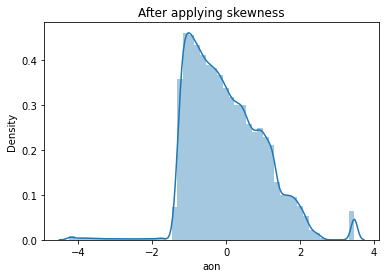

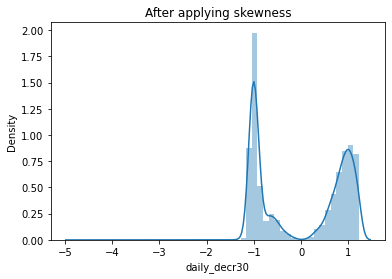

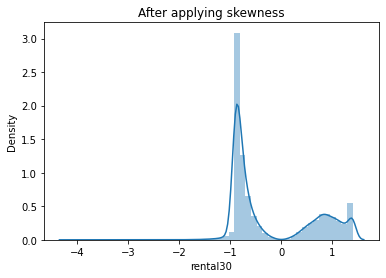

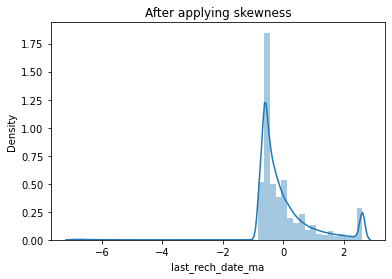

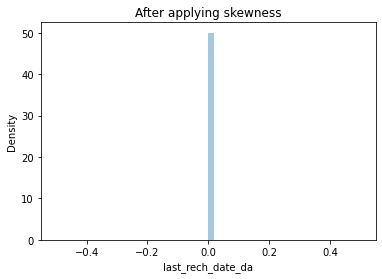

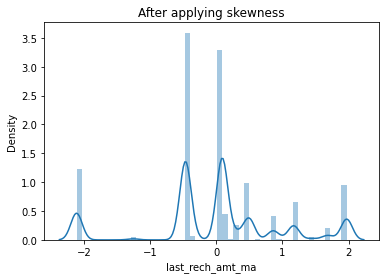

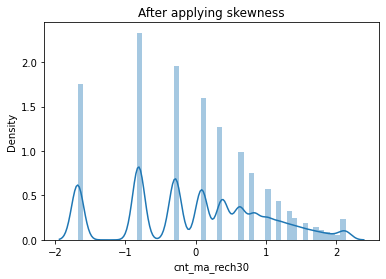

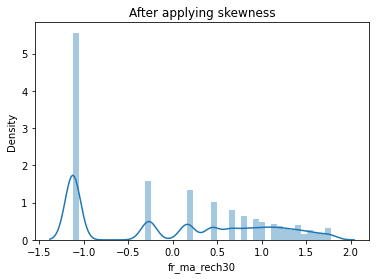

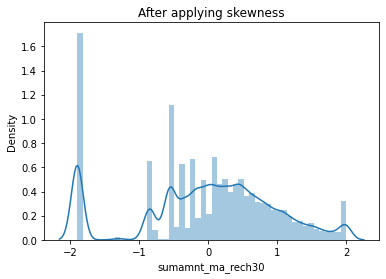

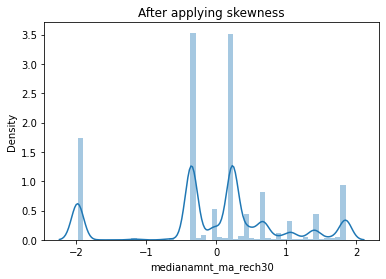

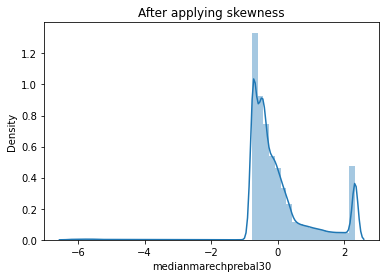

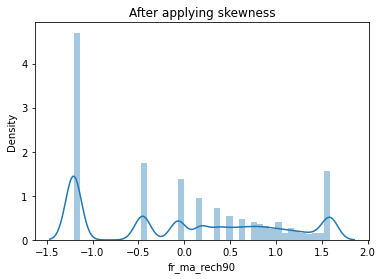

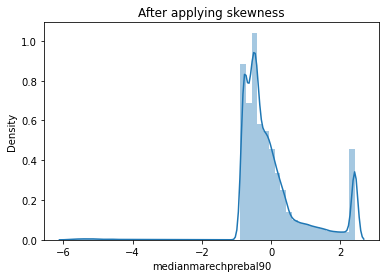

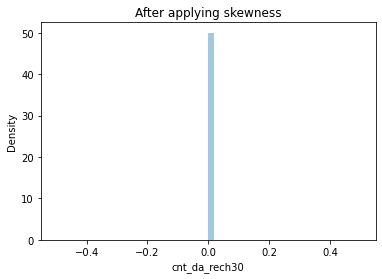

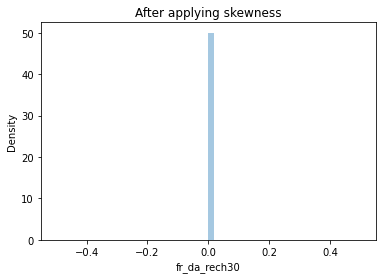

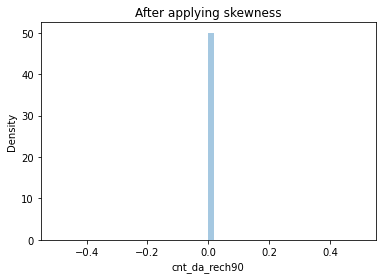

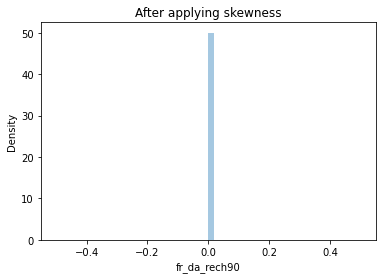

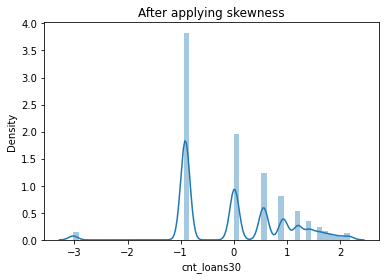

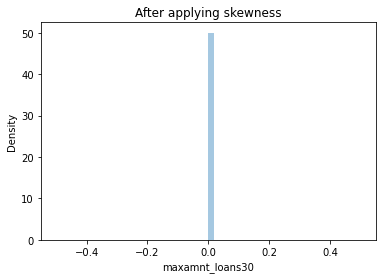

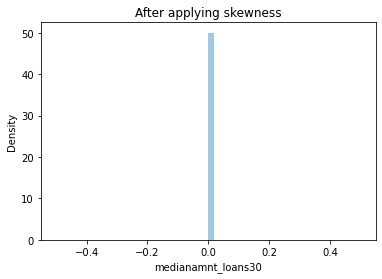

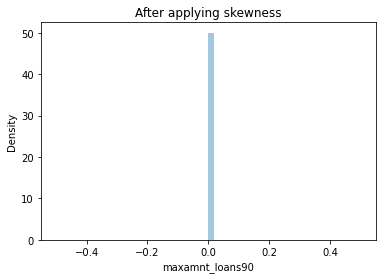

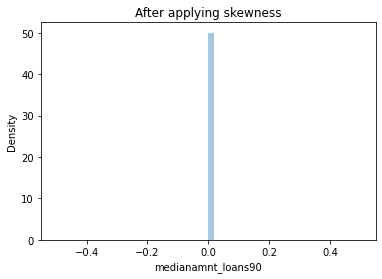

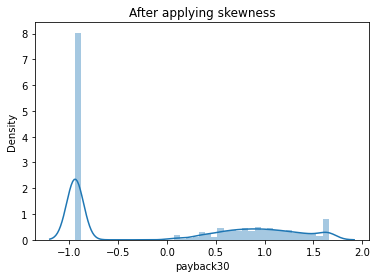

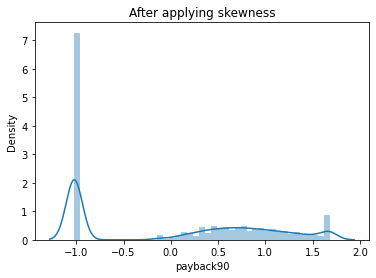

In [115]:
column = ['aon', 'daily_decr30', 'rental30', 'last_rech_date_ma',
       'last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'fr_ma_rech90', 'medianmarechprebal90',
       'cnt_da_rech30', 'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90',
       'cnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90']

for i in x[column]:
    sns.distplot(x[i])
    plt.title('After applying skewness')
    plt.show()

In [116]:
from sklearn.preprocessing import MinMaxScaler

In [117]:
sc=MinMaxScaler()

In [118]:
dfnew=sc.fit_transform(x)

In [119]:
dfnew=pd.DataFrame(dfnew,columns=x.columns)

In [120]:
x=dfnew

In [121]:
x.head()

,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,...,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,maxamnt_loans30,medianamnt_loans30,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0.458876,0.912425,0.588268,0.678977,0.0,0.539110,0.364150,0.974732,0.437781,0.577617,...,0.0,0.0,0.0,0.582527,0.0,0.0,0.0,0.0,1.000000,1.000000
1,0.577667,0.970855,0.884670,0.934146,0.0,0.929565,0.227555,0.000000,0.543941,1.000000,...,0.0,0.0,0.0,0.404972,0.0,0.0,0.0,0.0,0.000000,0.000000
2,0.534336,0.765118,0.611539,0.694676,0.0,0.539110,0.227555,0.000000,0.343479,0.577617,...,0.0,0.0,0.0,0.404972,0.0,0.0,0.0,0.0,0.000000,0.000000
3,0.448549,0.624899,0.586250,1.000000,0.0,0.439866,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.582527,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0.629745,0.646651,0.619351,0.710013,0.0,0.637893,0.705567,0.442813,0.827115,0.690770,...,0.0,0.0,0.0,0.885056,0.0,0.0,0.0,0.0,0.609579,0.535457


# Data Balancing

In [122]:
y.value_counts()

1    183431
0     26162
Name: label, dtype: int64

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import plot_roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [124]:
#Finding best random state
maxaccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxaccu:
        maxaccu=accu
        maxRS=i
print('Best accuracy',maxaccu,'for random state',maxRS)

Best accuracy 0.8828047965902224 for random state 32


In [125]:
pip install imblearn

In [126]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

In [127]:
from imblearn.under_sampling import NearMiss

x_train_miss, y_train_miss= NearMiss().fit_resample(x_train, y_train.ravel())

In [128]:
x_train_miss.shape

(41982, 24)

In [129]:
y_train_miss.shape

(41982,)

In [130]:
from collections import Counter

In [131]:
Counter(y)

Counter({0: 26162, 1: 183431})

In [133]:
Counter(y_train_miss)

Counter({0: 20991, 1: 20991})

# Since the outcome has only two variables, we can use binary classification

In [134]:
lg=LogisticRegression()
gnb=GaussianNB()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()

In [135]:
model = [lg,gnb,dtc,rfc]
for i in model:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print('Accuracy score of',i)
    print(accuracy_score(y_test,pred))
    print(f1_score(y_test,pred))
    print(precision_score(y_test,pred))
    print(recall_score(y_test,pred))

Accuracy score of LogisticRegression()
0.8819151220210406
0.9362934362934362
0.8882350068372729
0.9898497877435507
Accuracy score of GaussianNB()
0.7989217300031012
0.8770153347826721
0.9454213721727641
0.8178404266898879
Accuracy score of DecisionTreeClassifier()
0.862138886900928
0.9210486768583411
0.924826469861999
0.9173016218569718
Accuracy score of RandomForestClassifier()
0.9110188697249457
0.950762975869898
0.9232208777686628
0.9799989115053881


Here best model seems to be RFC on the basis of F1 score but this could be due to underfitting or overfitting.

In [136]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lr,x,y,cv=5, scoring='f1')
print('Cross validation for LogisticRegression is', scr.mean())

Cross validation for LogisticRegression is 0.9349480957031723


In [137]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(gnb,x,y,cv=5, scoring='f1')
print('Cross validation for GaussianNB is', scr.mean())

Cross validation for GaussianNB is 0.8766729230373869


In [138]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dtc,x,y,cv=5, scoring='f1')
print('Cross validation for Decision Tree Classifier is', scr.mean()) 

Cross validation for Decision Tree Classifier is 0.9206116817410015


In [139]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rfc,x,y,cv=5, scoring='f1')
print('Cross validation for Random Forest Classifier is', scr.mean()) 

Cross validation for Random Forest Classifier is 0.9503263624573668


# HyperParameter tuning

In [140]:
from sklearn.model_selection import GridSearchCV

In [141]:
# Random Forest Hyperparameter tuning
parameters = {'n_estimators':[100],
             'max_depth':[4,5,6,7,8],
             'criterion':['gini','entropy']}

In [142]:
GCV_RF=GridSearchCV(RandomForestClassifier(),parameters,cv=5)
GCV_RF.fit(x_train,y_train)
GCV_RF.best_params_

{'criterion': 'gini', 'max_depth': 8, 'n_estimators': 100}

In [143]:
RF_mod=RandomForestClassifier(criterion = 'gini',max_depth = 8,n_estimators=100)
RF_mod.fit(x_train,y_train)
pred=RF_mod.predict(x_test)
print(accuracy_score(y_test,pred))
print(f1_score(y_test,pred))

0.9029557002791098
0.9473343517775303


In [144]:
# Decision Tree Hyperparameter tuning
parameters = {'max_depth': np.arange(2,10),
             'criterion': ['gini','entropy']}

In [145]:
GCV_DTC = GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)
GCV_DTC.fit(x_train,y_train)
GCV_DTC.best_params_

{'criterion': 'gini', 'max_depth': 9}

In [146]:
DTC_mod = DecisionTreeClassifier(criterion = 'entropy',max_depth=9)
DTC_mod.fit(x_train,y_train)
pred=DTC_mod.predict(x_test)
print(accuracy_score(y_test,pred))
print(f1_score(y_test,pred))

0.9079415062382213
0.949587845693608


In [147]:
#Logistic Regression Hyperparameter tuning
penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
solver = ['liblinear', 'saga']

In [150]:
param_grid = dict(penalty=penalty,
                  C=C,
                  solver=solver)

In [151]:
grid = GridSearchCV(estimator=LogisticRegression(),
                    param_grid=param_grid,
                    scoring='f1',
                    verbose=1,
                    n_jobs=-1)
grid_result = grid.fit(x_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Score:  0.9347123724048826
Best Params:  {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}


In [154]:
LR_mod = LogisticRegression(C=0.1,penalty='l2', solver= 'saga')
LR_mod.fit(x_train,y_train)
pred=LR_mod.predict(x_test)
print(accuracy_score(y_test,pred))
print(f1_score(y_test,pred))

0.8817242777738018
0.9362183857771373


In [152]:
# Hyperparameter tuning for GaussianNB
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

In [153]:
from sklearn.preprocessing import PowerTransformer
gs_NB = GridSearchCV(estimator=GaussianNB(), 
                     param_grid=params_NB, 
                     cv=3,
                     verbose=1, 
                     scoring='f1')
Data_transformed = PowerTransformer().fit_transform(x_train,y_train)

gs_NB.fit(Data_transformed,y_train);
print('Best Score: ', gs_NB.best_score_)
print('Best Params: ', gs_NB.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Score:  0.8955021239557387
Best Params:  {'var_smoothing': 1.0}


In [156]:
GNB_mod = GaussianNB(var_smoothing = 1.0)
GNB_mod.fit(x_train,y_train)
pred=GNB_mod.predict(x_test)
print(accuracy_score(y_test,pred))
print(f1_score(y_test,pred))

0.8522149860445144
0.9154046783466019


# AUC ROC Curve

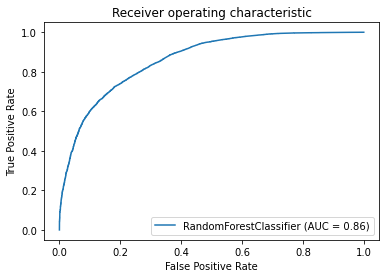

In [157]:
plot_roc_curve(RF_mod,x_test,y_test)
plt.title('Receiver operating characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

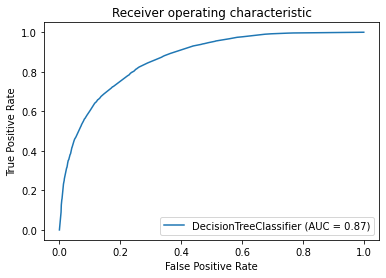

In [158]:
plot_roc_curve(DTC_mod,x_test,y_test)
plt.title('Receiver operating characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

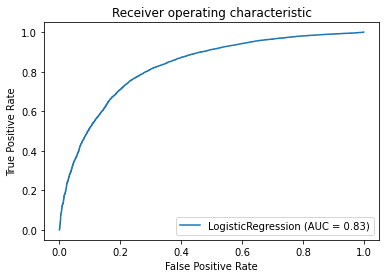

In [162]:
plot_roc_curve(LR_mod,x_test,y_test)
plt.title('Receiver operating characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

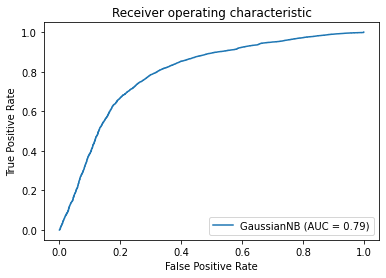

In [161]:
plot_roc_curve(GNB_mod,x_test,y_test)
plt.title('Receiver operating characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

DTC is the best model with 87% AUC score and 94.9% f1 score after hyperparameter tuning.